In [50]:
import numpy as np
import pandas as pd

In [51]:
import matplotlib as plt 

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [52]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [53]:
df.head()
df.shape

(891, 3)

In [54]:
# df.dropna(inplace=True)
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [55]:
df.dropna(inplace=True)
df.shape

(714, 3)

In [56]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [57]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [58]:
x_train, x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [59]:
x_train.head(2)

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542


In [60]:
clf = DecisionTreeClassifier()

In [61]:
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [63]:
accuracy_score(y_test,y_pred)

0.6293706293706294

In [65]:
np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy'))

np.float64(0.6415492957746479)

In [106]:
kbin_age = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')

In [107]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [108]:
x_train_trf = trf.fit_transform(x_train)
x_test_trf = trf.fit_transform(x_test)

In [109]:
trf.named_transformers_['first'].n_bins_

array([10])

In [110]:
trf.named_transformers_['first'].bin_edges_

array([array([ 1. , 11. , 17. , 20.6, 24. , 28. , 30.1, 34.4, 38.6, 47.8, 62. ])],
      dtype=object)

In [111]:
output = pd.DataFrame({
    'age': x_train['Age'],
    'age_trf': x_train_trf[:,0],
    'fare' : x_train['Fare'],
    'fare_trf' : x_train_trf[:,1],
})

In [112]:
output

,age,age_trf,fare,fare_trf
328,31.0,5.0,20.5250,5.0
73,26.0,4.0,14.4542,4.0
253,30.0,5.0,16.1000,5.0
719,33.0,6.0,7.7750,1.0
666,25.0,4.0,13.0000,4.0
...,...,...,...,...
92,46.0,8.0,61.1750,8.0
134,25.0,4.0,13.0000,4.0
337,41.0,7.0,134.5000,9.0
548,33.0,6.0,20.5250,5.0


In [113]:
output['age_labels'] = pd.cut(x=x_train['Age'],
                              bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=x_train['Fare'],
                              bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [114]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
562,28.0,4.0,13.5000,4.0,"(24.0, 28.0]","(10.5, 14.454]"
646,19.0,2.0,7.8958,2.0,"(17.0, 20.6]","(7.743, 7.925]"
116,70.5,9.0,7.7500,1.0,NaN,"(7.743, 7.925]"
253,30.0,5.0,16.1000,5.0,"(28.0, 30.1]","(14.454, 22.62]"
736,48.0,8.0,34.3750,7.0,"(47.8, 62.0]","(28.39, 38.1]"


In [115]:
clf = DecisionTreeClassifier()
clf.fit(x_train_trf,y_train)
y_pred2=clf.predict(x_test_trf)

In [117]:
accuracy_score(y_test,y_pred2)

0.6853146853146853

In [119]:
x_trf=trf.fit_transform(x)
np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy'))

np.float64(0.6275234741784038)

In [125]:
import matplotlib.pyplot as plt

def descretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf= ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    x_trf = trf.fit_transform(x)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Age'])
    plt.title('Before')
    
    plt.subplot(122)
    plt.hist(x_trf[:,0],color='red')
    plt.title("After")
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Fare'])
    plt.title('Before')
    
    plt.subplot(122)
    plt.hist(x_trf[:,1],color='red')
    plt.title("After")
    
    plt.show()
    
    

0.6274843505477308


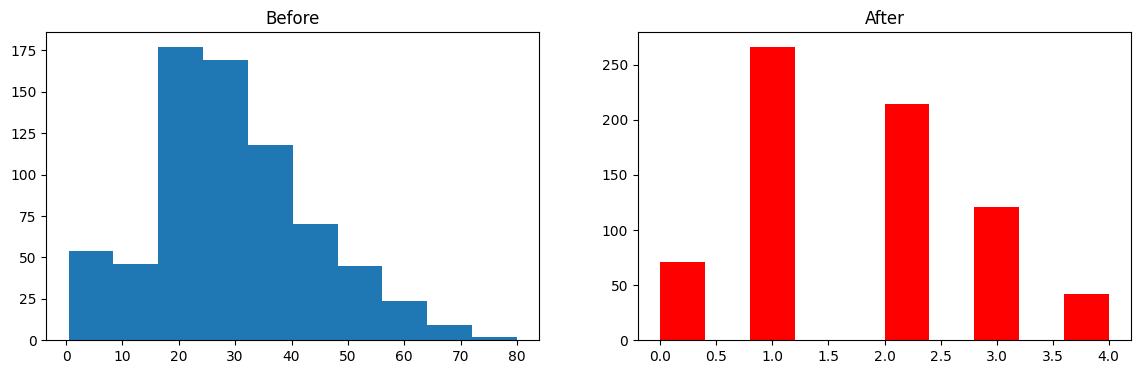

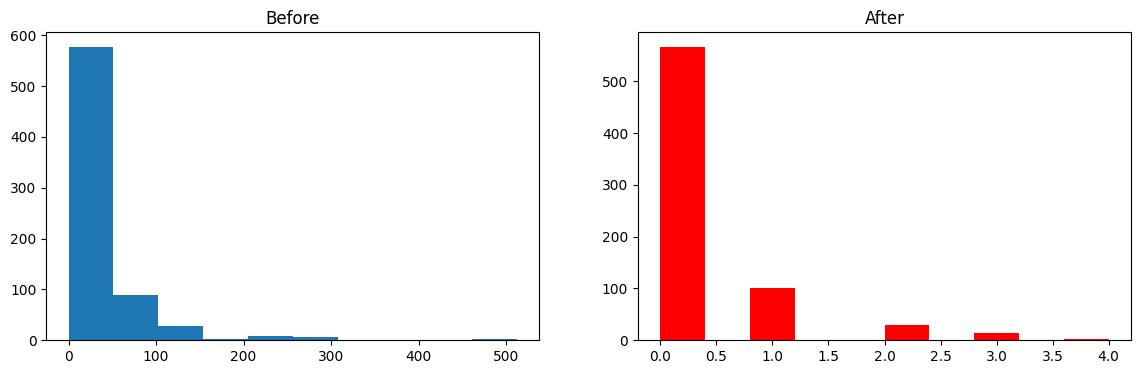

In [129]:
descretize(5,'kmeans')